# Importing and Exploration Data

In [1]:
import pandas as pd
import datetime as dt
import pymongo
import dns
import matplotlib.pyplot as plt
import pycountry_convert as pc
import seaborn as sns
import panel as pn
import numpy as np
import matplotlib.pyplot as pl
import pymongo

In [2]:
#Connection to Cluster MongoDb
def mongo_connect():
    try:
        username = "Freddoloso"
        password = "Milano01"
        url = "mongodb+srv://%s:%s@cluster0.gg85x.mongodb.net/<dbname>?retryWrites=true&w=majority"
        client = pymongo.MongoClient(url % (username, password))

    except Exception as e:
        print(e)
        client = None
        
    return client 

In [3]:
#Add Country Code
dict_country_code= {
    'Åland': 'ALA', 
    'American Samoa': 'ASM',
    'Andorra': 'AND',
    'Anguilla': 'AIA',
    'Antigua And Barbuda': 'ATG',
    'Aruba': 'ABW',
    'Bahamas': 'BHS',
    'Bahrain': 'BHR',
    'Barbados': 'BRB',
    'Bonaire, Saint Eustatius And Saba': 'BES',
    'Bosnia And Herzegovina': 'BIH',
    'British Virgin Islands': 'VGB',
    'Burma': 'BUR',
    "Côte D'Ivoire": "CIV",
    'Cape Verde': 'CPV',
    'Cayman Islands': 'CYM',
    'Christmas Island': 'CXR',
    'Comoros': 'COM',
    'Congo (Democratic Republic Of The)': 'COD',
    'Congo': 'COG',
    'Curaçao': 'CUW',
    'Czech Republic': 'CZE',
    'Denmark (Europe)': 'DNK',
    'Dominica': 'DMA',
    'Falkland Islands (Islas Malvinas)': 'FLK',
    'Faroe Islands': 'FRO',
    'Federated States Of Micronesia': 'FSM',
    'France (Europe)': 'FRA',
    'French Guiana': 'GUF',
    'French Polynesia': 'PYF',
    'Grenada': 'GRD',
    'Guadeloupe': 'GLP',
    'Guam': 'GUM',
    'Guernsey': 'GGY',
    'Guinea Bissau': 'GNB',
    'Heard Island And Mcdonald Islands': 'HMD',
    'Hong Kong': 'HKG',
    'Isle Of Man': 'IMN',
    'Jersey': 'JEY',
    'Kiribati': 'KIR',
    'Liechtenstein': 'LIE',
    'Malta': 'MLT',
    'Martinique': 'MTQ',
    'Mauritius': 'MUS',
    'Mayotte': 'MYT',
    'Monaco': 'MCO',
    'Montserrat': 'MSR',
    'Netherlands (Europe)': 'NLD',
    'Niue': 'NIU',
    'North America': 'NNN',
    'Northern Mariana Islands': 'MNP',
    'Palau': 'PLW',
    'Palestina': 'PSE',
    'Reunion': 'REU',
    'Saint Barthélemy': 'BLM',
    'Saint Kitts And Nevis': 'KNA',
    'Saint Lucia': 'LCA',
    'Saint Martin': 'MAF',
    'Saint Pierre And Miquelon': 'SPM',
    'Saint Vincent And The Grenadines': 'VCT',
    'Samoa': 'WSM',
    'San Marino': 'RSM',
    'Sao Tome And Principe': 'STP',
    'Serbia': 'SCG',
    'Seychelles': 'SYC',
    'Singapore': 'SGP',
    'Sint Maarten': 'SXM',
    'South America': 'SRR',
    'South Georgia And The South Sandwich Isla': 'SGS',
    'Svalbard And Jan Mayen': 'SJM',
    'Swaziland': 'SWZ',
    'Tanzania': 'TZA',
    'Timor Leste': 'TLS',
    'Tonga': 'TON',
    'Trinidad And Tobago': 'TTO',
    'Turks And Caicas Islands': 'TCA',
    'United Kingdom (Europe)': 'GBR',
    'United States': 'USA',
    'Virgin Islands': 'VIR'
}

dict_country_code.update(pc.map_country_name_to_country_alpha3())  #Keys already existing are overwritten

def country_code_search(name):
    return dict_country_code.get(name, None) #The get command, used on a dictionary, permit to set default values when it doesn't find correspondences.
                                             #Otherwise, there would be a KeyError.

In [4]:
#Delete outliers 
def del_outliers(df, col_names=None):
    if col_names == None:
        cols = df._get_numeric_data().columns.values
    else:
        cols = col_names

    #IQR(Inter Quartile Range) = Q3 - Q1
    q1 = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
    iqr = q3 - q1

    #Take all rows in which there is at least 1 not outlier value
    df_clear = df[~((df[cols] < (q1 - 1.5 * iqr)) |(q1[cols] > (q3 + 1.5 * iqr))).any(axis=1)]
    return df_clear

<img alt="IQR" src="https://upload.wikimedia.org/wikipedia/commons/8/89/Boxplot_vs_PDF.png" width="500">

## Data GlobalLandTemperaturesByMajorCity

In [5]:
#Read files and create DataFrame
file_major_city = 'data\\GlobalLandTemperaturesByMajorCity.csv'
df_major_city = pd.read_csv(file_major_city)

df_major_city['year'] = pd.DatetimeIndex(df_major_city['dt']).year
df_major_city["dt"] = df_major_city["dt"].apply(pd.to_datetime)
df_major_city["Latitude"] = df_major_city["Latitude"].apply(lambda x: float(("-" if x[-1]=='S' else "") + x[:-1]))
df_major_city["Longitude"] = df_major_city["Longitude"].apply(lambda y: float(("-" if y[-1]=='W' else "") + y[:-1]))

df_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1849


In [6]:
#Delete rows with null values, then check isNa and ShapeFile
df_before_after = pd.DataFrame(columns=["Before", "After"])
df_before_after ['Before'] = df_major_city.isna().any()
row_shape_before, col_shape_before = df_major_city.shape
df_describe_before = df_major_city.describe()

df_major_city = df_major_city.dropna()
df_before_after ['After'] = df_major_city.isna().any()
row_shape_after, col_shape_after = df_major_city.shape
df_describe_after = df_major_city.describe()

df_before_after=df_before_after.T
df_before_after['Shape_Rows']=[row_shape_before,row_shape_after]
df_before_after['Shpae_Cols']=[col_shape_before, col_shape_after]

df_before_after

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,Shape_Rows,Shpae_Cols
Before,False,True,True,False,False,False,False,False,239177,8
After,False,False,False,False,False,False,False,False,228175,8


In [7]:
#Show describe Before deleting null values (NaN) 
df_describe_before

,AverageTemperature,AverageTemperatureUncertainty,Latitude,Longitude,year
count,228175.000000,228175.000000,239177.000000,239177.000000,239177.000000
mean,18.125969,0.969343,22.532770,43.720482,1910.394800
std,10.024800,0.979644,21.953405,64.951070,63.230923
min,-26.772000,0.040000,-37.780000,-118.700000,1743.000000
25%,12.710000,0.340000,12.050000,4.050000,1864.000000
50%,20.428000,0.592000,28.130000,45.000000,1914.000000
75%,25.918000,1.320000,37.780000,99.910000,1963.000000
max,38.283000,14.037000,60.270000,151.780000,2013.000000


In [8]:
#Show describe After deleting null values (NaN) 
df_describe_after

,AverageTemperature,AverageTemperatureUncertainty,Latitude,Longitude,year
count,228175.000000,228175.000000,228175.000000,228175.000000,228175.000000
mean,18.125969,0.969343,22.909201,43.991053,1913.893209
std,10.024800,0.979644,22.010981,65.299955,62.025981
min,-26.772000,0.040000,-37.780000,-118.700000,1743.000000
25%,12.710000,0.340000,13.660000,4.050000,1869.000000
50%,20.428000,0.592000,28.130000,45.000000,1918.000000
75%,25.918000,1.320000,39.380000,103.660000,1966.000000
max,38.283000,14.037000,60.270000,151.780000,2013.000000


In [9]:
#Delete outliers
df_clean_major_city=del_outliers(df_major_city, ['AverageTemperature','AverageTemperatureUncertainty'])
df_clean_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1849


In [10]:
#Creating DataFrame to compare datas before and after cleaning
df_AverageTemperature = pd.DataFrame(columns=["Before", "After"])
df_AverageTemperature['Before'] = df_major_city['AverageTemperature']
df_AverageTemperature['After'] = df_clean_major_city['AverageTemperature']

df_AverageTemperatureUncertainty = pd.DataFrame(columns=["Before", "After"])
df_AverageTemperatureUncertainty['Before'] = df_major_city['AverageTemperatureUncertainty']
df_AverageTemperatureUncertainty['After'] = df_clean_major_city['AverageTemperatureUncertainty'] 


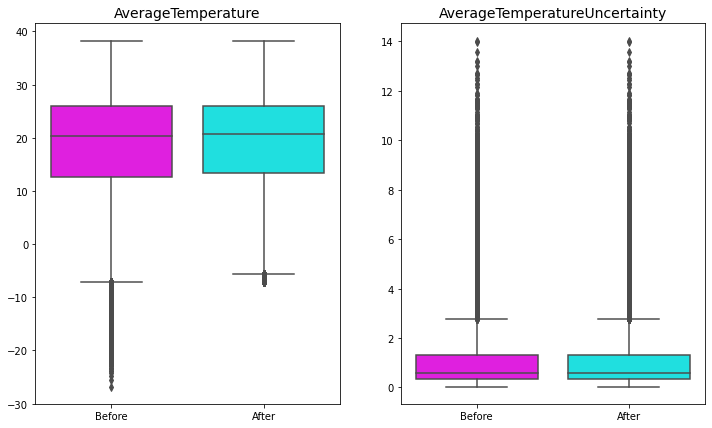

In [11]:
#Boxplot to verify the distribution before and after deleting outliers
def boxplot(sns, ax, df, title):
    sns.boxplot(ax=ax, data=df, palette=["fuchsia", "aqua"]).set_title(title, fontsize=14)
    
fig, ax = plt.subplots(figsize=(12, 7), ncols=2, nrows=1)
boxplot(sns, ax[0], df_AverageTemperature, 'AverageTemperature')
boxplot(sns, ax[1], df_AverageTemperatureUncertainty, 'AverageTemperatureUncertainty')

In [12]:
#Skewness (it's a measure of asymmetry of a distribution ) after and before deleting outliers 
#Ideally, the skewness value should be between -1 and +1. Skewness= 0 means a Simmetrical distribution
skew_data={'AverageTemperature':{'Before':df_major_city['AverageTemperature'].skew(),
                                 'After':df_clean_major_city['AverageTemperature'].skew()}, 
           'AverageTemperatureUncertainty':{'Before':df_major_city['AverageTemperatureUncertainty'].skew(),
                                            'After':df_clean_major_city['AverageTemperatureUncertainty'].skew()}}
df_skew = pd.DataFrame(skew_data)
df_skew

,AverageTemperature,AverageTemperatureUncertainty
Before,-0.935779,2.910709
After,-0.741950,2.928188


<img alt="IQR" src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="500">

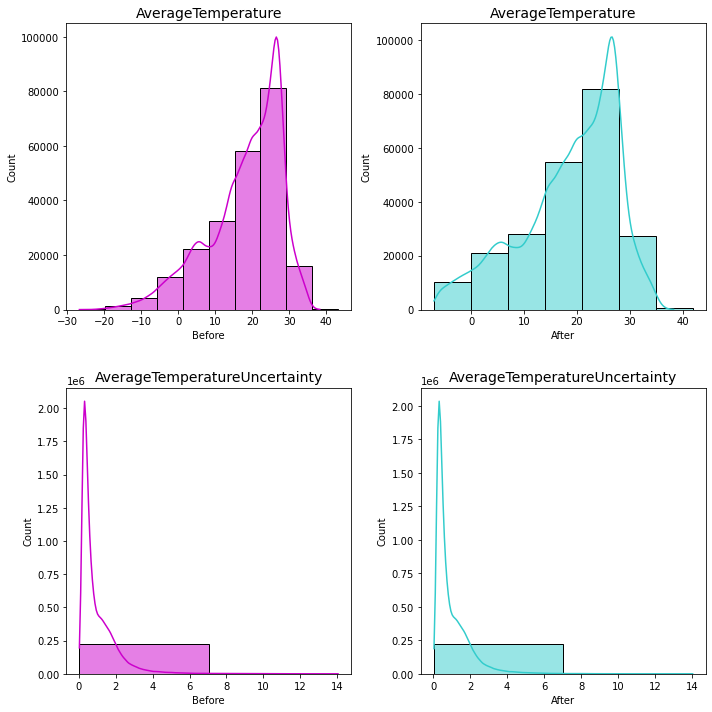

In [13]:
#Histogram before and after deleting outliers 
data = [(df_AverageTemperature["Before"], '#CC00CC', "AverageTemperature"),
        (df_AverageTemperature["After"] , '#33CCCC' , "AverageTemperature"),
        (df_AverageTemperatureUncertainty["Before"], '#CC00CC', "AverageTemperatureUncertainty"),
        (df_AverageTemperatureUncertainty["After"],  '#33CCCC', "AverageTemperatureUncertainty")]

fig = plt.figure(figsize=(10, 10))
for i, (col, color, title) in enumerate(data):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=col , binwidth=7, color=color, kde=True).set_title(title, fontsize=14)
fig.tight_layout(h_pad=3)

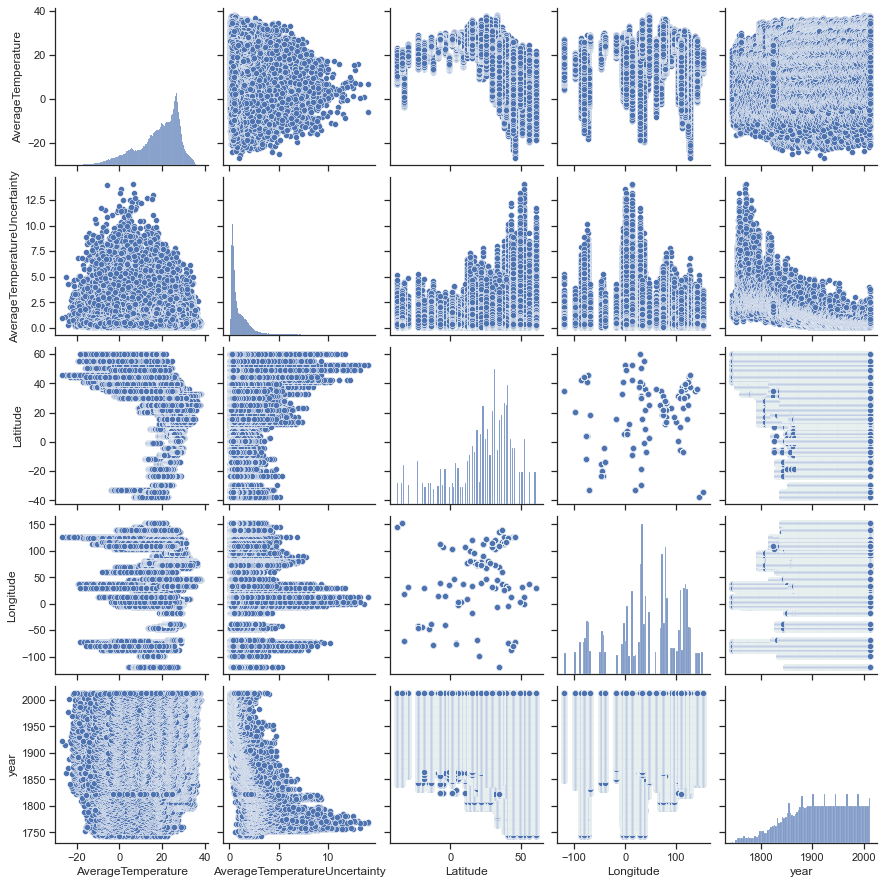

In [14]:
#Seaborn Before deleting outliers 
sns.set_theme(style="ticks")
sns.pairplot(df_major_city)

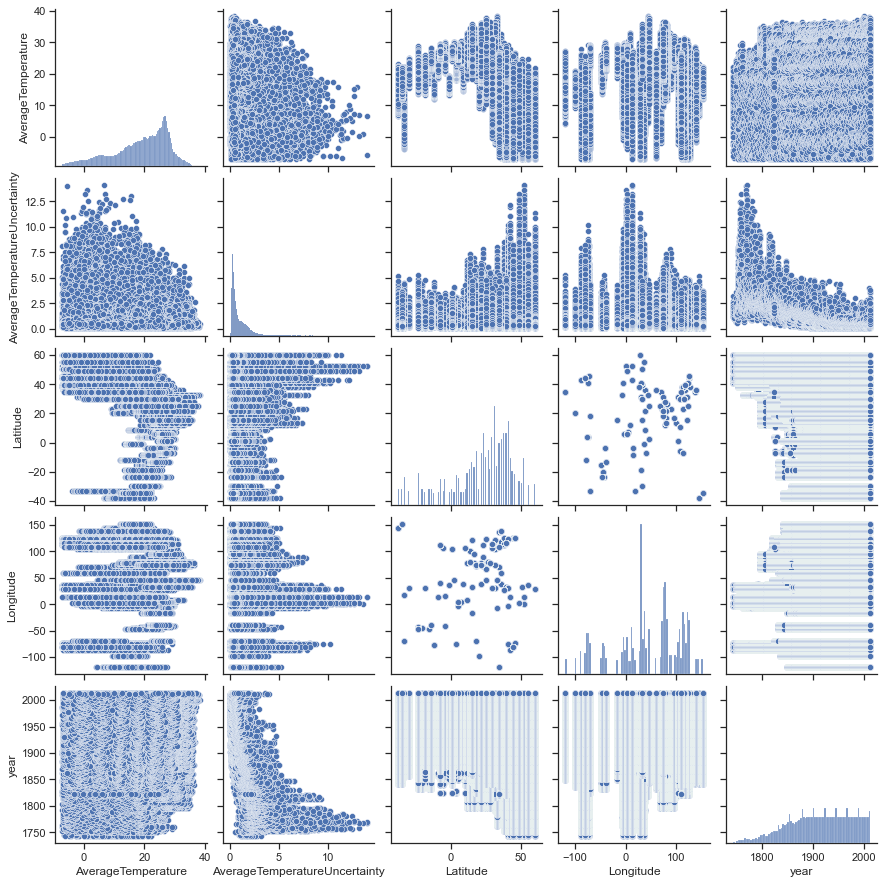

In [15]:
#Seaborn After deleting outliers 
sns.set_theme(style="ticks")
sns.pairplot(df_clean_major_city)

## Data GlobalLandTemperaturesByCountry

In [16]:
#Read files and create DataFrame
file_country = 'data\\GlobalLandTemperaturesByCountry.csv'
df_country = pd.read_csv(file_country)
df_country["year"] = pd.DatetimeIndex(df_country["dt"]).year
df_country["dt"] = df_country["dt"].apply(pd.to_datetime)
df_country["Country_code"] = df_country["Country"].apply(lambda country: country_code_search(country))

df_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,Country_code
0,1743-11-01,4.384,2.294,Åland,1743,ALA
1,1743-12-01,NaN,NaN,Åland,1743,ALA
2,1744-01-01,NaN,NaN,Åland,1744,ALA
3,1744-02-01,NaN,NaN,Åland,1744,ALA
4,1744-03-01,NaN,NaN,Åland,1744,ALA


In [17]:
#Delete rows with null values, then check isNa and ShapeFile
df_before_after = pd.DataFrame(columns=["Before", "After"])
df_before_after ['Before'] = df_country.isna().any()
row_shape_before, col_shape_before = df_country.shape
df_describe_before = df_country.describe()

df_country = df_country.dropna()
df_before_after ['After'] = df_country.isna().any()
row_shape_after, col_shape_after = df_country.shape
df_describe_after = df_country.describe()

df_before_after=df_before_after.T
df_before_after['Shape_Rows']=[row_shape_before,row_shape_after]
df_before_after['Shpae_Cols']=[col_shape_before, col_shape_after]

df_before_after

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,Country_code,Shape_Rows,Shpae_Cols
Before,False,True,True,False,False,True,577462,6
After,False,False,False,False,False,False,527168,6


In [18]:
#Show describe Before deleting null values (NaN) 
df_describe_before

,AverageTemperature,AverageTemperatureUncertainty,year
count,544811.000000,545550.000000,577462.000000
mean,17.193354,1.019057,1908.819188
std,10.953966,1.201930,65.916942
min,-37.658000,0.052000,1743.000000
25%,10.025000,0.323000,1862.000000
50%,20.901000,0.571000,1914.000000
75%,25.814000,1.206000,1964.000000
max,38.842000,15.003000,2013.000000


In [19]:
#Show describe After deleting null values (NaN) 
df_describe_after

,AverageTemperature,AverageTemperatureUncertainty,year
count,527168.000000,527168.000000,527168.000000
mean,17.173150,1.027036,1912.814657
std,10.985302,1.209782,64.471550
min,-37.658000,0.052000,1743.000000
25%,9.998000,0.325000,1869.000000
50%,20.873000,0.573000,1919.000000
75%,25.808000,1.219000,1966.000000
max,38.842000,15.003000,2013.000000


In [20]:
#Delete outliers
df_clean_country=del_outliers(df_country, ['AverageTemperature','AverageTemperatureUncertainty'])
df_clean_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,Country_code
0,1743-11-01,4.384,2.294,Åland,1743,ALA
5,1744-04-01,1.530,4.680,Åland,1744,ALA
6,1744-05-01,6.702,1.789,Åland,1744,ALA
7,1744-06-01,11.609,1.577,Åland,1744,ALA
8,1744-07-01,15.342,1.410,Åland,1744,ALA


In [21]:
#Creating DataFrame to compare datas before and after cleaning
df_AverageTemperature = pd.DataFrame(columns=["Before", "After"])
df_AverageTemperature['Before'] = df_country['AverageTemperature']
df_AverageTemperature['After'] = df_clean_country['AverageTemperature']

df_AverageTemperatureUncertainty = pd.DataFrame(columns=["Before", "After"])
df_AverageTemperatureUncertainty['Before'] = df_country['AverageTemperatureUncertainty']
df_AverageTemperatureUncertainty['After'] = df_clean_country['AverageTemperatureUncertainty'] 


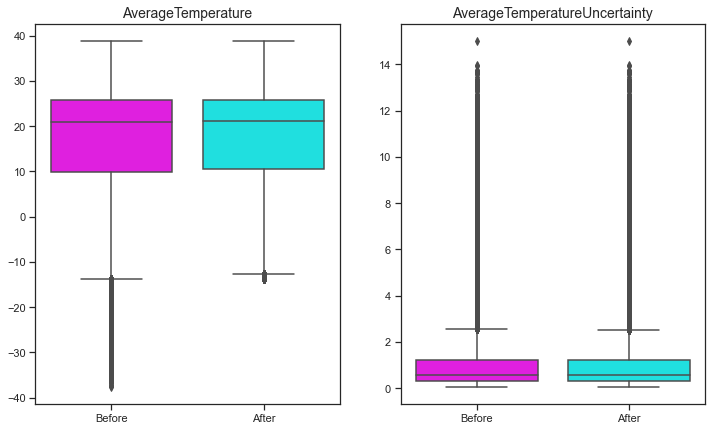

In [22]:
#Boxplot to verify the distribution before and after deleting outliers
def boxplot(sns, ax, df, title):
    sns.boxplot(ax=ax, data=df, palette=["fuchsia", "aqua"]).set_title(title, fontsize=14)
    
fig, ax = plt.subplots(figsize=(12, 7), ncols=2, nrows=1)
boxplot(sns, ax[0], df_AverageTemperature, 'AverageTemperature')
boxplot(sns, ax[1], df_AverageTemperatureUncertainty, 'AverageTemperatureUncertainty')

In [23]:
#Skewness (it's a measure of asymmetry of a distribution ) after and before deleting outliers 
#Ideally, the skewness value should be between -1 and +1. Skewness= 0 means a Simmetrical distribution
skew_data={'AverageTemperature':{'Before':df_country['AverageTemperature'].skew(),
                                 'After':df_clean_country['AverageTemperature'].skew()}, 
           'AverageTemperatureUncertainty':{'Before':df_country['AverageTemperatureUncertainty'].skew(),
                                            'After':df_clean_country['AverageTemperatureUncertainty'].skew()}}
df_skew = pd.DataFrame(skew_data)
df_skew

,AverageTemperature,AverageTemperatureUncertainty
Before,-1.118160,3.123205
After,-0.824686,3.177605


<img alt="IQR" src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="500">

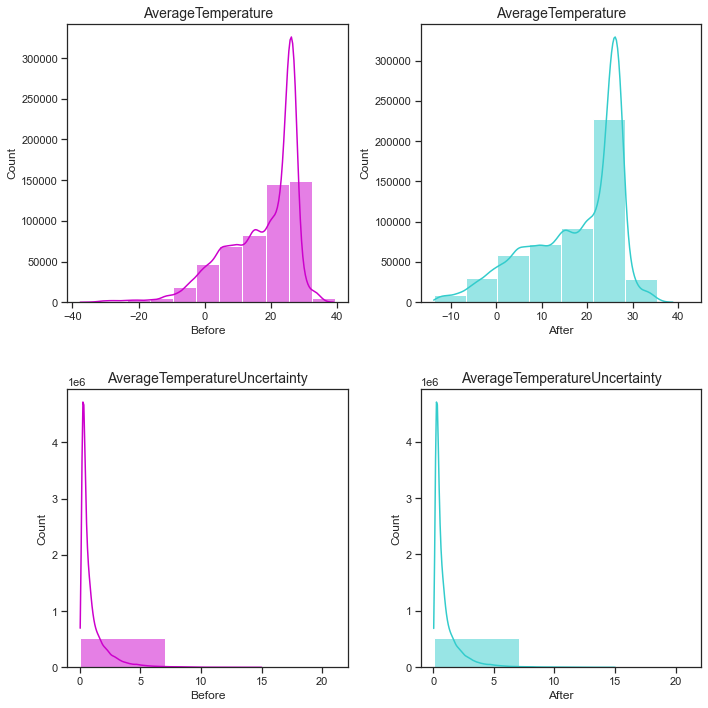

In [24]:
#Histogram before and after deleting outliers 
data = [(df_AverageTemperature["Before"], '#CC00CC', "AverageTemperature"),
        (df_AverageTemperature["After"] , '#33CCCC' , "AverageTemperature"),
        (df_AverageTemperatureUncertainty["Before"], '#CC00CC', "AverageTemperatureUncertainty"),
        (df_AverageTemperatureUncertainty["After"],  '#33CCCC', "AverageTemperatureUncertainty")]

fig = plt.figure(figsize=(10, 10))
for i, (col, color, title) in enumerate(data):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=col , binwidth=7, color=color, kde=True).set_title(title, fontsize=14)
fig.tight_layout(h_pad=3)

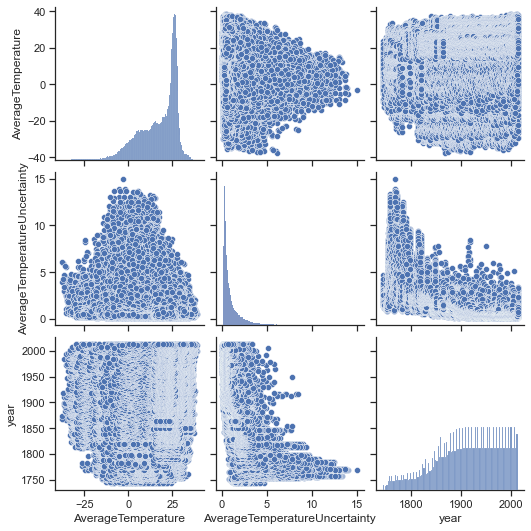

In [25]:
#Seaborn Before deleting outliers 
sns.set_theme(style="ticks")
sns.pairplot(df_country)

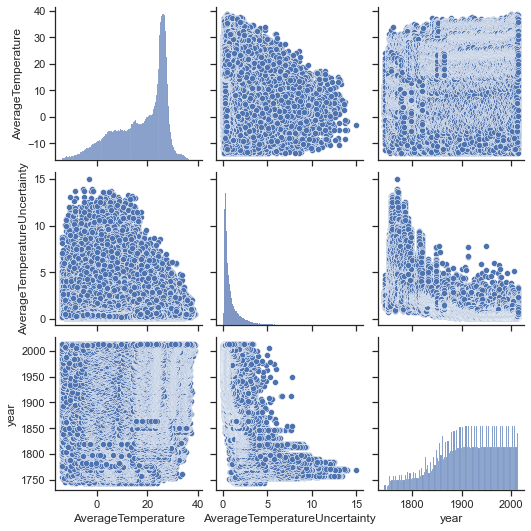

In [26]:
#Seaborn After deleting outliers 
sns.set_theme(style="ticks")
sns.pairplot(df_clean_country)

## Store data on MongoDb

In [ ]:
#Connection to MongoDB and creation of new collections
client = mongo_connect()
if (client is not None):
    db = client["Map_temperatures"]
    col_major_city = db["by_major_city"]
    col_major_city.insert_many(df_clean_major_city.to_dict('records')) 
    col_country = db["by_country"]
    col_country.insert_many(df_clean_country.to_dict('records')) 
